# Implemented PCA for DataSet 1 using Eigen value decomposition and also using PCA function imported from sklearn.decomposition package

Here in this code I have set the threshold value to 97% and observed the result, for 97% variance number of vectors to keep is 89. Plotted power law curve and also variance distribution vs PC.

In [1]:
import pandas as pd
import numpy as np
data1 = pd.read_csv("dist1_500_1.txt",sep = " ",header=None).dropna() #reading the file dist1_500_1.txt
data2= pd.read_csv("dist1_500_2.txt",sep = " ",header=None).dropna() #reading the file dist1_500_2.txt
df_list = [data1,data2]
dataSet1= pd.concat(df_list) #combined two files 


# Standerdizing the whole dataSet
from sklearn.preprocessing import StandardScaler
XStandard = StandardScaler().fit_transform(dataSet1)

# Compute the mean of the data
mean_vec = np.mean(XStandard, axis=0)

# Compute the covariance matrix
covariance_mat = (XStandard - mean_vec).T.dot((XStandard - mean_vec)) / (XStandard.shape[0]-1)


# OR we can do this with one line of numpy:
covariance_mat = np.cov(XStandard.T)


# Compute the eigen values and vectors using numpy
eigen_vals, eigen_vecs = np.linalg.eig(covariance_mat)

# print('Eigenvectors \n%s' %eigen_vecs)
# print('\nEigenvalues \n%s' %eigen_vals)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)


exp_var_percentage =97 # Threshold of 97% explained variance

tot = sum(eigen_vals)
var_exp = [(i / tot)*100 for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("cumulative variance is",cum_var_exp)

num_vec_to_keep = 0

for index, percentage in enumerate(cum_var_exp):
  if percentage > exp_var_percentage:
    num_vec_to_keep = index + 1
    break


num_features = XStandard.shape[1]
proj_mat = eig_pairs[0][1].reshape(num_features,1)
for eig_vec_idx in range(1, num_vec_to_keep):
  proj_mat = np.hstack((proj_mat, eig_pairs[eig_vec_idx][1].reshape(num_features,1)))

# Project the data 
pca_data = XStandard.dot(proj_mat)

cumulative variance is [ 40.563862    41.76929591  42.9230797   44.0428927   45.13488574
  46.20225331  47.22917262  48.24305967  49.24045195  50.22238608
  51.19746353  52.1518926   53.08603102  54.01037347  54.92633865
  55.81442291  56.68031115  57.54430166  58.4043825   59.25165722
  60.08124238  60.89995449  61.70760236  62.51316506  63.30485286
  64.08676247  64.85914941  65.62502543  66.38545259  67.12836627
  67.8599404   68.5829151   69.29867787  70.00327497  70.68742828
  71.36912806  72.04322846  72.71290808  73.37719273  74.03124908
  74.67433627  75.30353536  75.93118121  76.54899395  77.15575637
  77.75655913  78.3544205   78.94751799  79.52953243  80.10251662
  80.66212479  81.21580931  81.76435722  82.30659337  82.84129756
  83.37462039  83.90121961  84.41308331  84.9165066   85.40903374
  85.8916399   86.3700003   86.84624312  87.31449446  87.77230875
  88.21801001  88.65726671  89.0945915   89.52535383  89.9529921
  90.36838236  90.78249961  91.19089935  91.5965293   

In [2]:
#number of vectors to keep
num_vec_to_keep

89

# Applying PCA function on Whole DataSet and plotted according to Power law curve

[40.56 41.77 42.92 44.04 45.13 46.2  47.23 48.24 49.24 50.22 51.2  52.15
 53.08 54.   54.92 55.81 56.68 57.54 58.4  59.25 60.08 60.9  61.71 62.52
 63.31 64.09 64.86 65.63 66.39 67.13 67.86 68.58 69.3  70.   70.68 71.36
 72.03 72.7  73.36 74.01 74.65 75.28 75.91 76.53 77.14 77.74 78.34 78.93
 79.51 80.08 80.64 81.19 81.74 82.28 82.81 83.34 83.87 84.38 84.88 85.37
 85.85 86.33 86.81 87.28 87.74 88.19 88.63 89.07 89.5  89.93 90.35 90.76
 91.17 91.58 91.98 92.38 92.78 93.17 93.56 93.94 94.31 94.67 95.03 95.38
 95.72 96.05 96.37 96.69 97.  ]


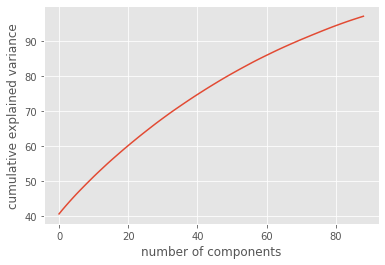

<Figure size 432x288 with 0 Axes>

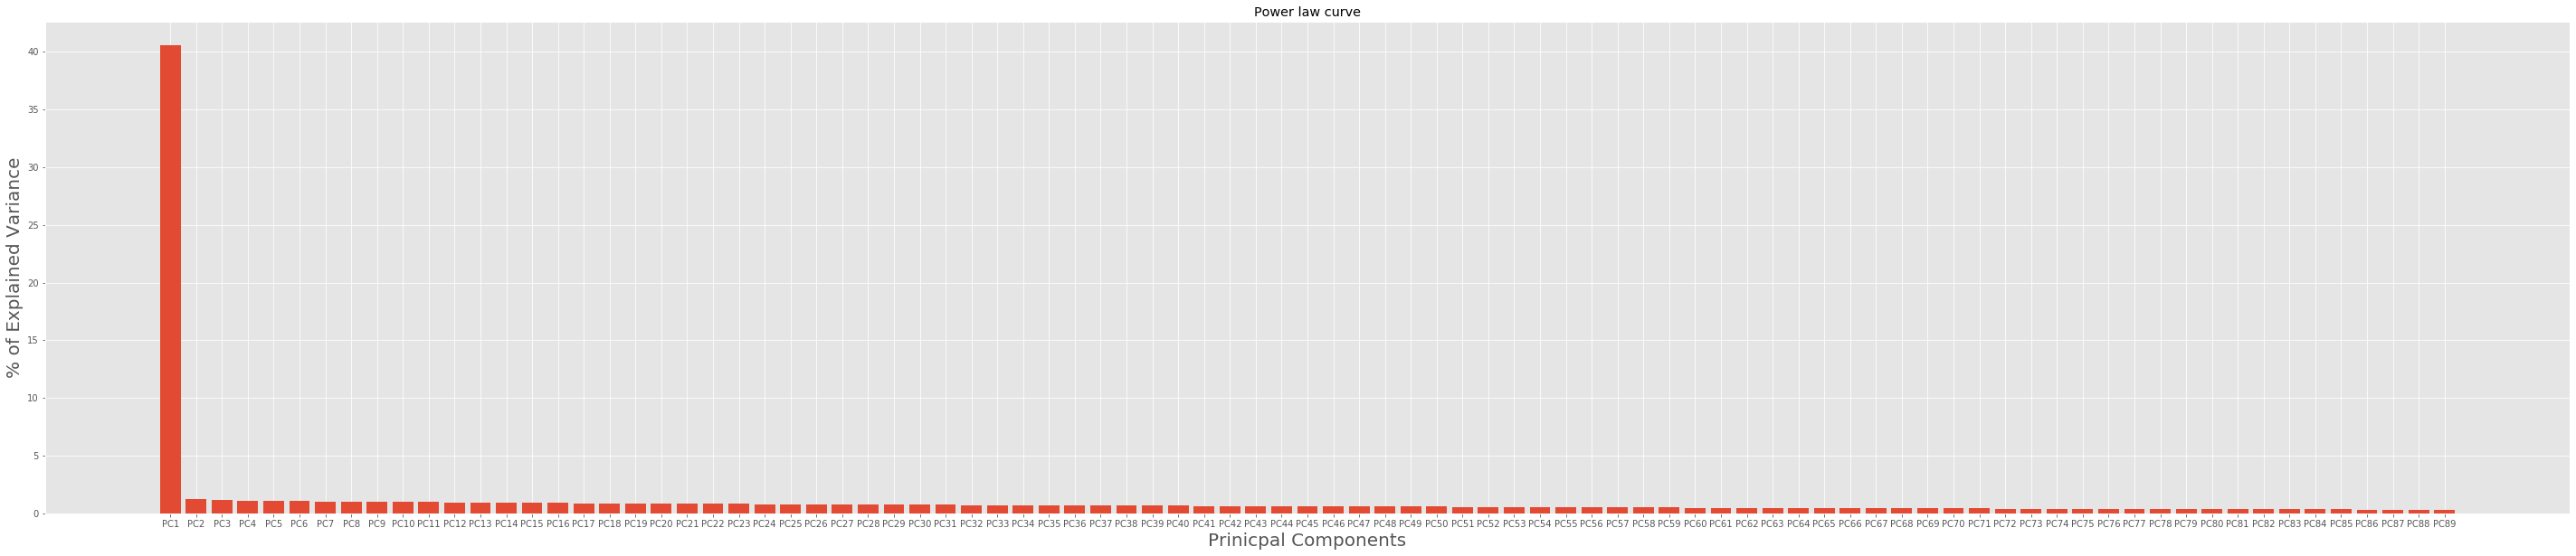

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

data1 = pd.read_csv("dist1_500_1.txt",sep = " ",header=None).dropna() #reading the data from dist2_500_1
data2= pd.read_csv("dist1_500_2.txt",sep = " ",header=None).dropna()  #reading the data from dist2_500_2
df_list = [data1,data2]  
dataSet1= pd.concat(df_list)

from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(dataSet1)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(0.97)
pca.fit(x_std)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.figure('1')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.plot(var1)

### plotting according to the Power law curve ###
per_varaiance=np.round(pca.explained_variance_ratio_ * 100,4)

labels = ['PC' + str(x) for x in range(1,len(per_varaiance)+1)]
plt.figure('2')
plt.figure(figsize=(50,10))
plt.bar(x= range(1,len(per_varaiance)+1),height=per_varaiance,tick_label=labels)
plt.ylabel('% of Explained Variance',fontsize=20)
plt.xlabel('Prinicpal Components',fontsize=20)
plt.title('Power law curve')
plt.show()
